In [3]:
import pandas as pd
import numpy as np
from siuba import *
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.plotting import parallel_coordinates
import os
from plotly.offline import plot # en Jupyter esta línea no es necesaria

# Lectura de archivos  

In [4]:
os.chdir("/home/sharkman/Documentos/DataDcience/EstadisticaMultiVariable/Tabla/")

In [5]:
iris = pd.read_csv("iris.csv")


In [6]:
iris.columns


Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

Cambiamos los nombres a las columnas debido a que los nombres contienen Puntos(.) como separacion y causa conflicto con Python por lo cual se cambiaron los puntos por guiones bajos (_)

In [7]:
iris = (iris >> rename(Sepal_Length = "Sepal.Length",
               Sepal_Width = "Sepal.Width",
               Petal_Length = "Petal.Length",
               Petal_Width = "Petal.Width")
       )

In [8]:
iris.columns


Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width',
       'Species'],
      dtype='object')

#  Histogramas y densidades por columna

## Histograma absoluto del ancho de sépalo sin distinguir especies

/home/sharkman/.local/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning:

'stat_bin()' using 'bins = 13'. Pick better value with 'binwidth'.



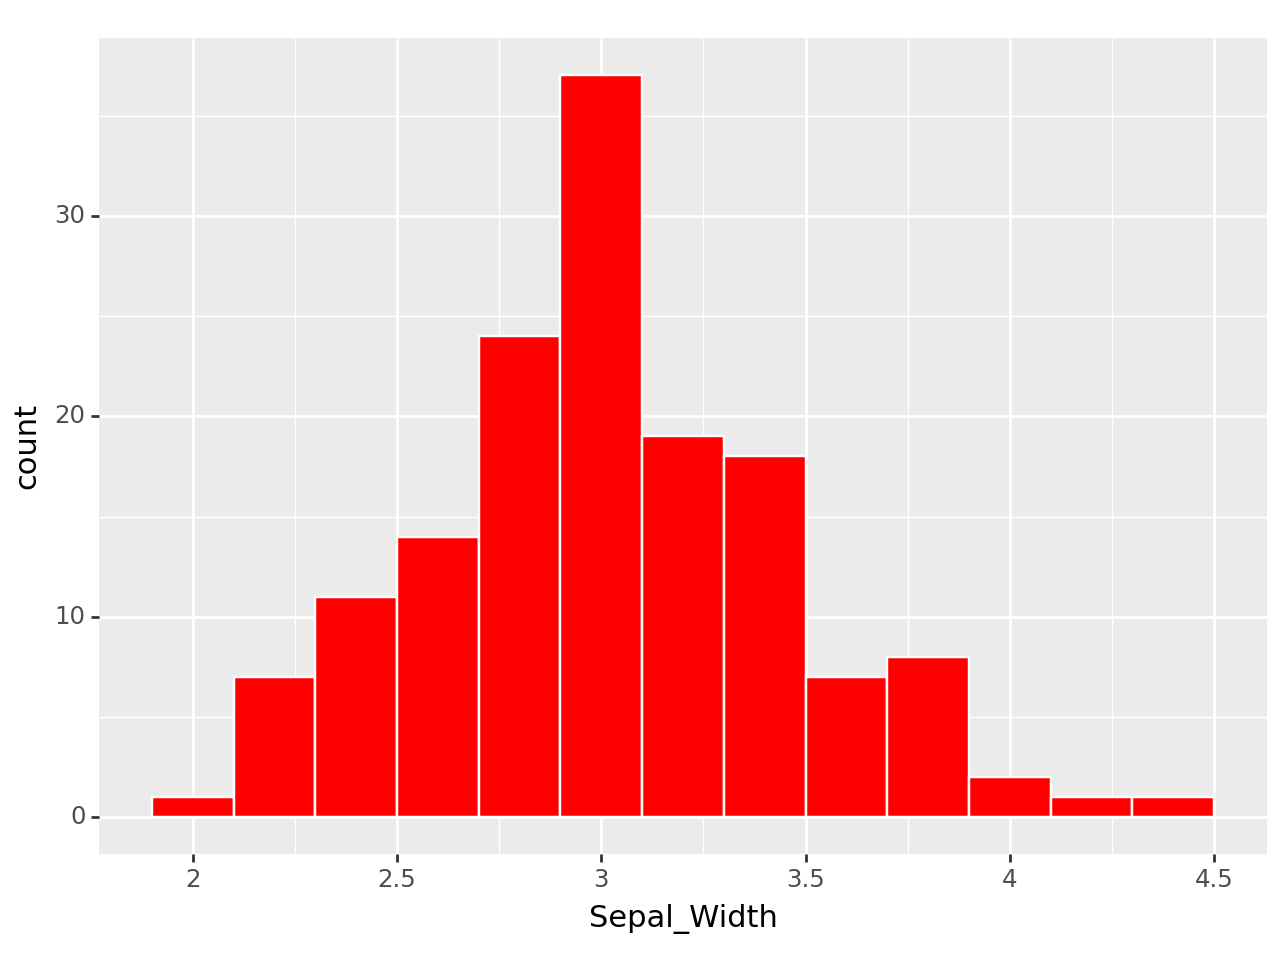

<Figure Size: (640 x 480)>

In [9]:
(ggplot(data=iris) +
  geom_histogram(mapping=aes(x="Sepal_Width"),
                 fill="red",
                 color="white")
)

## Histograma relativo del ancho de sépalo sin distinguir especies incluyendo densidad

/home/sharkman/.local/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning:

'stat_bin()' using 'bins = 13'. Pick better value with 'binwidth'.



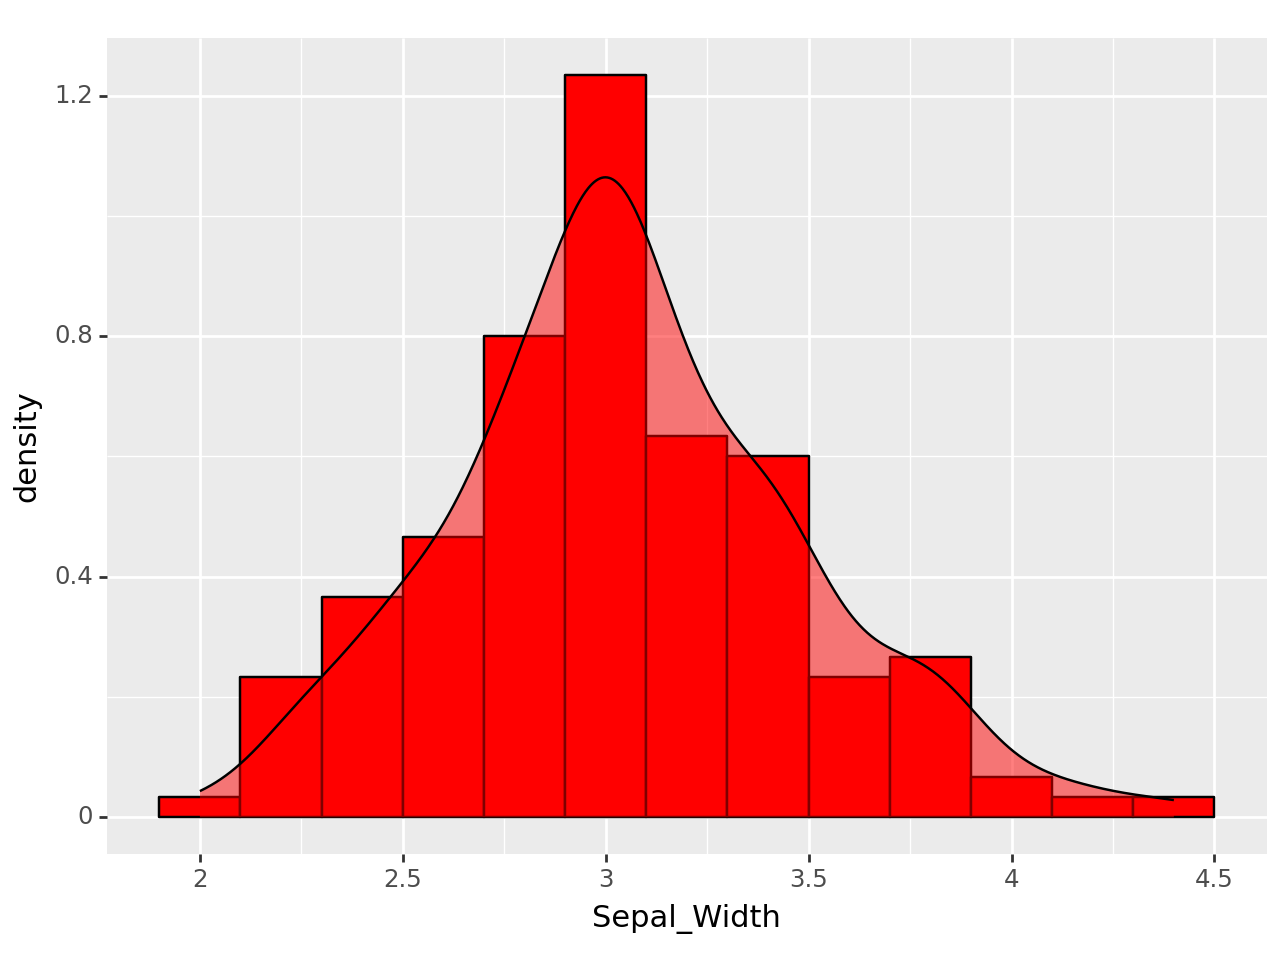

<Figure Size: (640 x 480)>

In [10]:
(ggplot(data=iris) +
  geom_histogram(mapping=aes(x="Sepal_Width",
                             y="..density.."),
                 fill="red",
                 color="black") +
  geom_density(mapping=aes(x="Sepal_Width"),
               fill="red",
               color="black",
               alpha=0.5)
)

## Histograma de longitud de sépalo separado por especies

In [11]:
iris_pl_setosa = (iris >> filter(_.Species=="setosa") >> select(_.Petal_Length)).squeeze()

In [12]:
iris_pl_virginica = (iris >> filter(_.Species=="virginica") >> select(_.Petal_Length)).squeeze()

In [13]:
iris_pl_versicolor = (iris >> filter(_.Species=="versicolor") >> select(_.Petal_Length)).squeeze()

In [14]:
plt.hist(iris_pl_setosa,alpha=0.5)

(array([ 1.,  1.,  2.,  7., 13., 13.,  7.,  4.,  0.,  2.]),
 array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ]),
 <BarContainer object of 10 artists>)

In [15]:
plt.hist(iris_pl_virginica,alpha=0.5)

(array([ 1.,  5., 12.,  4.,  9.,  8.,  5.,  2.,  1.,  3.]),
 array([4.5 , 4.74, 4.98, 5.22, 5.46, 5.7 , 5.94, 6.18, 6.42, 6.66, 6.9 ]),
 <BarContainer object of 10 artists>)

In [16]:
plt.hist(iris_pl_versicolor,alpha=0.5)

(array([ 1.,  2.,  3.,  2.,  8.,  7.,  6., 10.,  7.,  4.]),
 array([3.  , 3.21, 3.42, 3.63, 3.84, 4.05, 4.26, 4.47, 4.68, 4.89, 5.1 ]),
 <BarContainer object of 10 artists>)

## Histograma de cada columna sin separar por especies

Convertimos la tabla iris a formato ordenado (tidy o largo)

In [17]:
iris_ordenado = iris >> gather("Medida","Valor",-_["Species"])

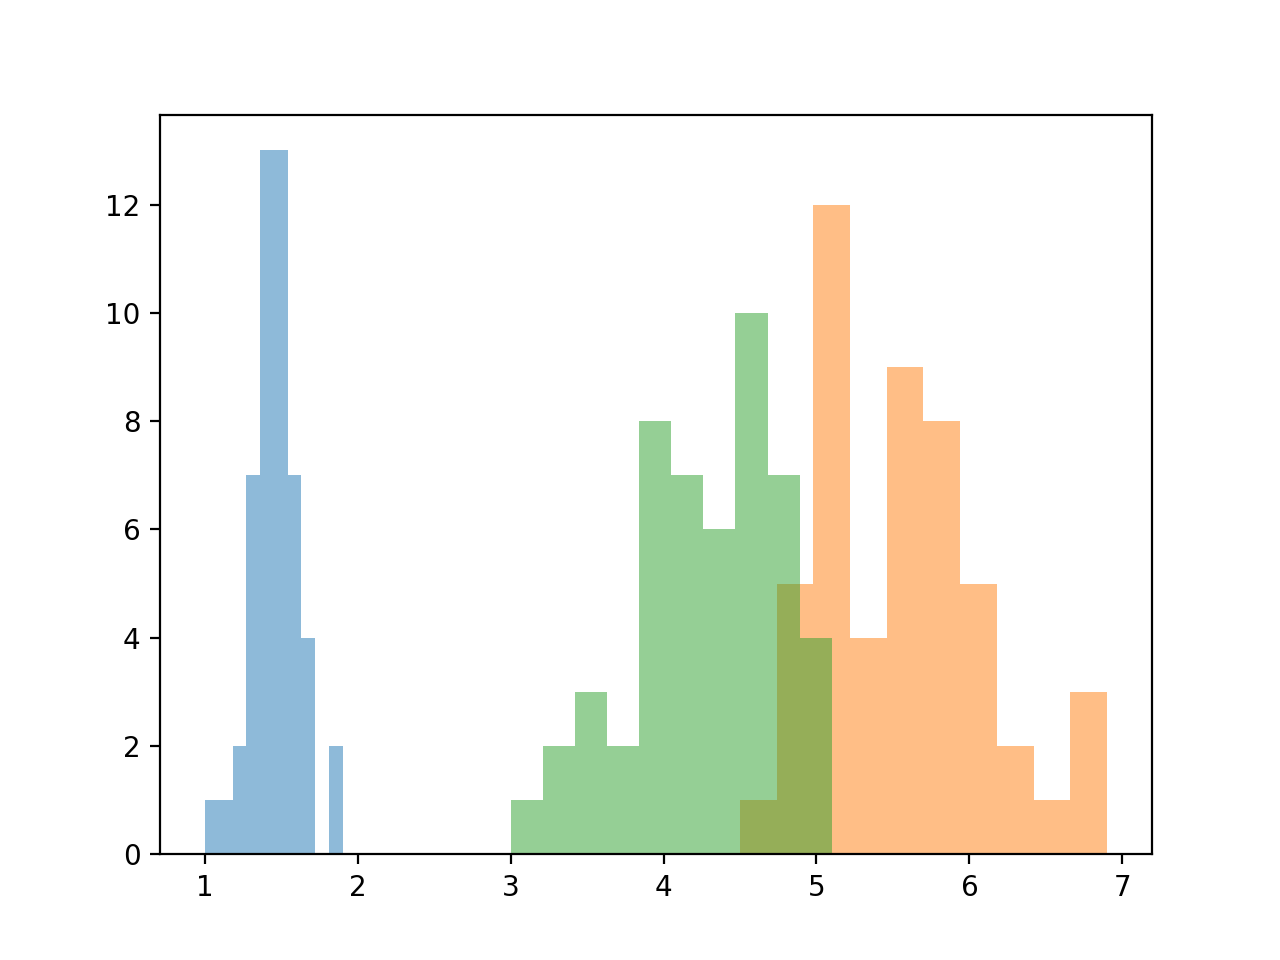

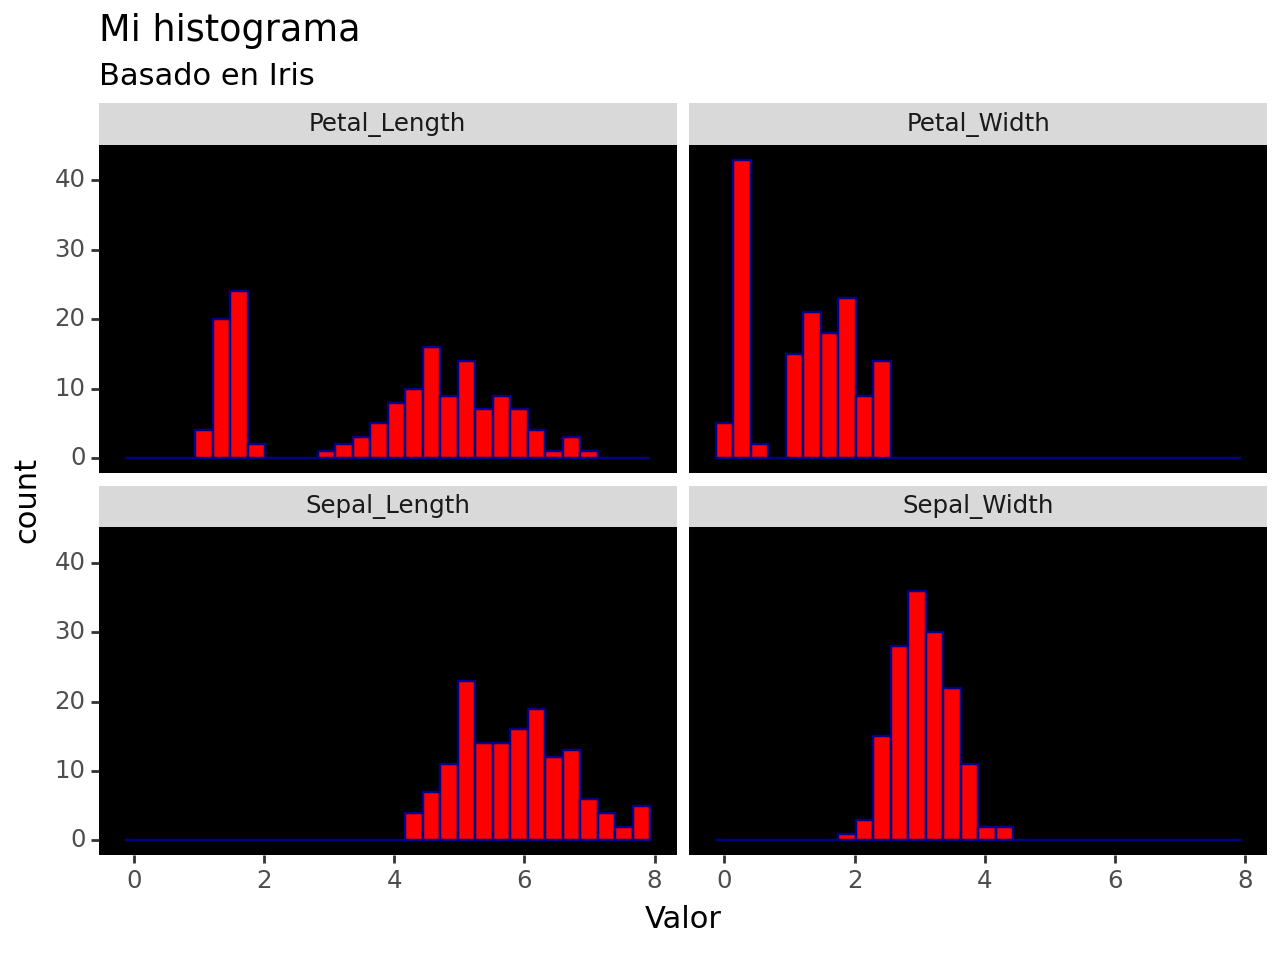

<Figure Size: (640 x 480)>

In [18]:
(ggplot(data=iris_ordenado) +
      geom_histogram(mapping=aes(x="Valor"),
                     fill="red",
                     color="darkblue",
                     bins=30) +
      labs(title = "Mi histograma",
           subtitle = "Basado en Iris") +
      theme(
        panel_background = element_rect("black"), 
        panel_grid = element_blank(),
      ) +
      facet_wrap("~Medida")
)

## Densidad de la longitud de pétalo separado por especies

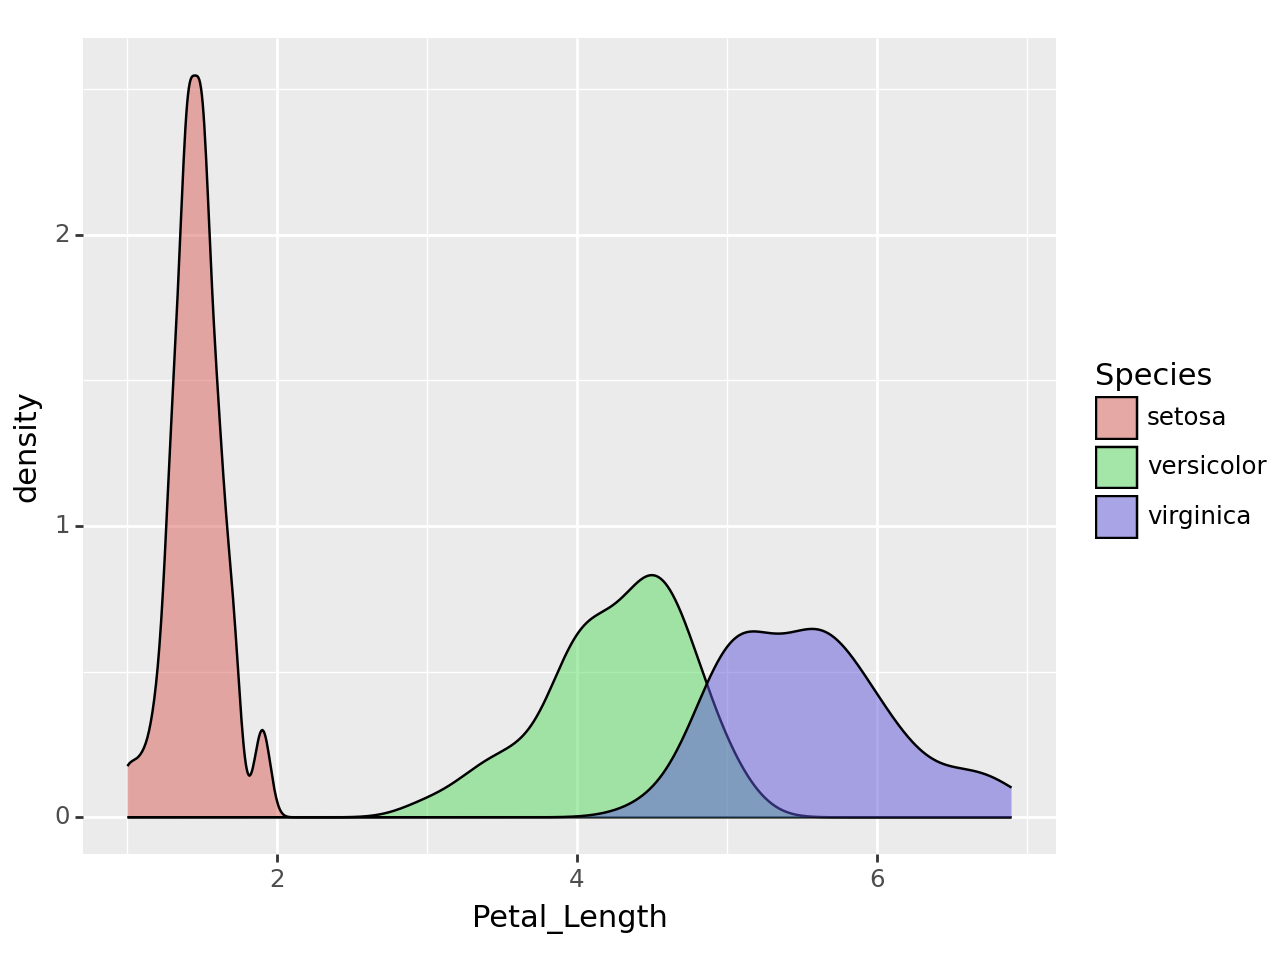

<Figure Size: (640 x 480)>

In [19]:
(ggplot(data=iris) +
  geom_density(mapping=aes(x="Petal_Length",
                           fill="Species"),
               color="black",
               alpha=0.5)
)

## Histograma con densidad de la longitud de pétalo separado por especies

In [20]:
sns.distplot(iris_pl_setosa)

/tmp/ipykernel_23504/683671579.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Petal_Length', ylabel='Density'>

In [21]:
sns.distplot(iris_pl_virginica)

/tmp/ipykernel_23504/581524336.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Petal_Length', ylabel='Density'>

In [22]:
sns.distplot(iris_pl_versicolor)

/tmp/ipykernel_23504/988806412.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Petal_Length', ylabel='Density'>

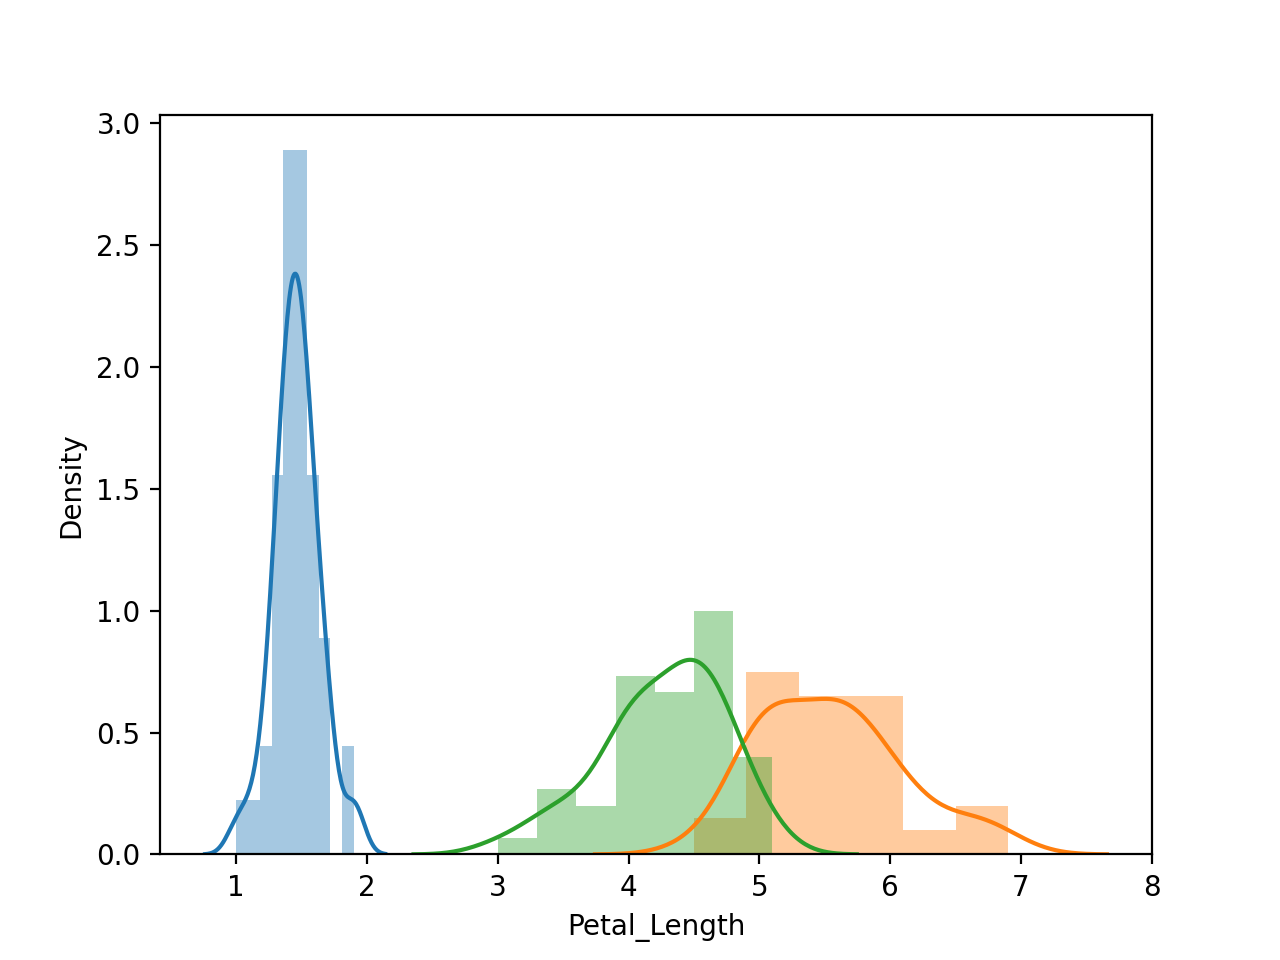

In [23]:
plt.show()


##  Nubes de puntos 

### Nube de puntos sin separar en especies

In [28]:
p = (ggplot(data=iris) +
  geom_point(mapping=aes(x="Sepal_Width",y="Sepal_Length"),color="red")
)

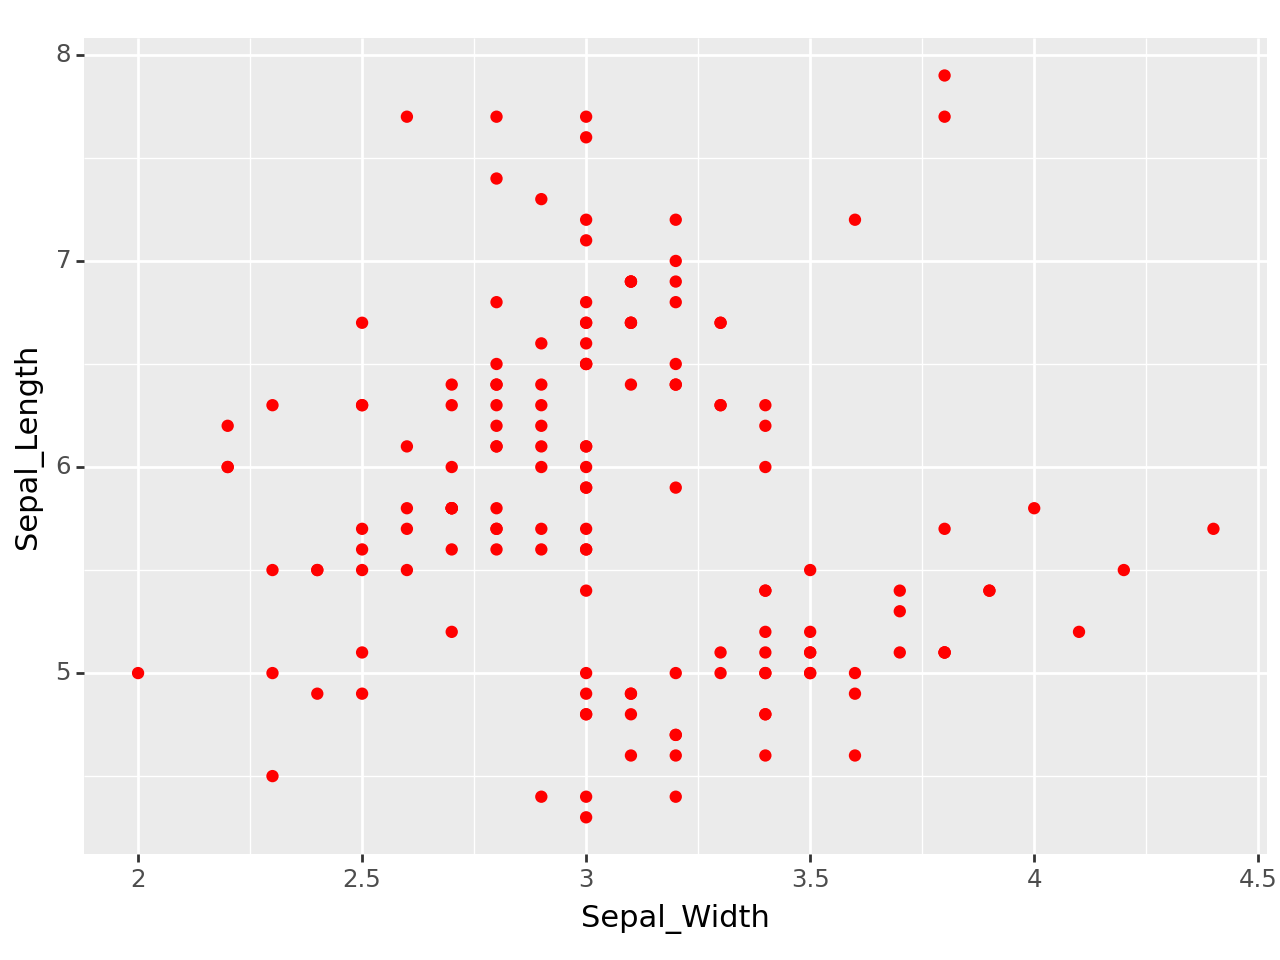

<Figure Size: (640 x 480)>

In [29]:
p

### Nube de puntos separando en especies 

In [30]:
r = (ggplot(data=iris) +
  geom_point(mapping=aes(x="Sepal_Width",y="Sepal_Length",color="Species")) +
  scale_color_manual(values=["red","orange","blue"])
)

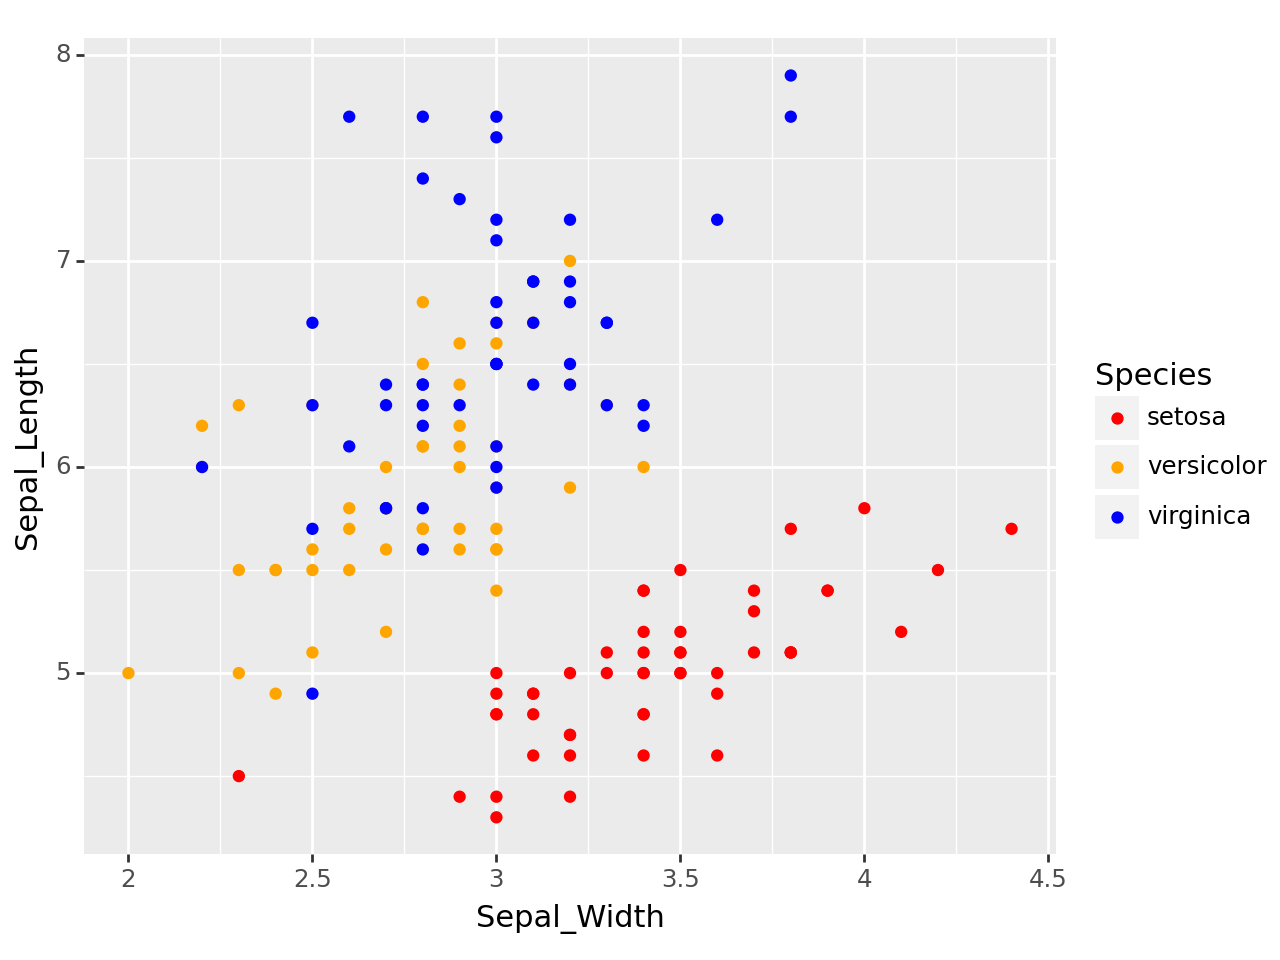

<Figure Size: (640 x 480)>

In [31]:
r

### Nube de puntos sin separar en especies con histogramas  

In [33]:
sns.jointplot(data=iris,x="Sepal_Length",y="Sepal_Width")

### Nube de puntos separando en especies con densidades

In [34]:
sns.jointplot(data=iris,x="Sepal_Length",y="Sepal_Width",hue="Species")

### Matriz de nubes de puntos sin información extra

In [35]:
sns.pairplot(iris,hue="Species")

### Nube de puntos para tres columnas 

In [36]:
nube_3d_sin_especies = px.scatter_3d(iris,x="Sepal_Length",y="Sepal_Width",z="Petal_Length")
plot(nube_3d_sin_especies)

'temp-plot.html'

In [37]:
nube_3d_con_especies = px.scatter_3d(iris,x="Sepal_Length",y="Sepal_Width",z="Petal_Length",color="Species")
plot(nube_3d_con_especies)

'temp-plot.html'

## Densidades conjuntas de dos columnas 

In [38]:
setosa = iris >> filter(_.Species == "setosa")

In [39]:
virginica = iris >> filter(_.Species == "virginica")

In [40]:
sns.kdeplot(data=setosa, x="Sepal_Width",y="Sepal_Length",
            cmap="Reds",fill=True,thresh=0.05)

<Axes: xlabel='Petal_Width', ylabel='Density'>

In [41]:
sns.kdeplot(data=virginica, x="Sepal_Width",y="Sepal_Length",
            cmap="Blues",fill=True,thresh=0.05)

<Axes: xlabel='Petal_Width', ylabel='Density'>

##  Mapa de calor de correlaciones

In [43]:
correlaciones = (iris >> select(-_.Species)).corr()

In [44]:
sns.heatmap(data=correlaciones,
            vmax=1,vmin=-1,
            cmap="Reds",
            linecolor="white",linewidth=0.5,
            square=True,
            annot=True,fmt=".2f")

<Axes: >

## Coordenadas paralelas 

In [ ]:
orden = ["Sepal_Length","Petal_Width","Petal_Length","Sepal_Width","Species"]